## Lecture 1 - Linear Regression
In this notebook, you will be implementing your own linear regression model. For this you must complete all of the exercises below. 

If you have any question, feel free to ask in the Dojo's whatssapp group.  

In [1]:
# Jupyter notebook display config
%config InlineBackend.figure_format='retina'

We will start importing the corresponding libraries. 

In [2]:
# Import libraries 
# Scientific computation 
import numpy as np 
# Visualization 
import matplotlib.pyplot as plt 
from matplotlib import style 
style.use('ggplot')
# Unit tests 
from unit_test import *

### Create your dataset
Let's create our dataset based on **N = 10** datapoints of the simplest linear function: <br>
y = mx + b 

In [3]:
# Dataset (linear model)
# Features 
x = np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1, 1)
# Labels 
y = np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1, 1)

### Define the hypothesis 
Remember the hypothesis is a linear combination of **n** features parameterized by **w** weights. Where **n** is equal to **w**. 
The task is to build two functions. One that initilizes the learning parameters **w**. And another that computes a linear combination using the features and the learning parameters. <br> <br>
** Exercise: ** Complete the function initialize_weights, your task is to return a tensor of the same size as features in order to compute the hypothesis. 

In [4]:
def initialize_weights(features):
    """ 
    Initialize the weights of the learning model
    :param features: tensor that contains the features of the model 
    : return: a tensor that contains random values with the same size of features
    """
    return np.random.rand(features.shape[1], 1)

# Unit test
test_initialize_weights(x, initialize_weights)

Tests passed


** Exercise: ** Complete the function compute_hypothesis, your task is to return a tensor that contains a linear combination of features and learning parameters.

In [5]:
def compute_hypothesis(features, weights):
    """
    Compute the linear combination of the hypothesis
    :param features: tensor that contains the features of the model
    :param weights: tensor that contains the random-initialized 
                    learning parameters of the model
    : return: a tensor that matrix multiplies the features and the weights
    """
    return np.dot(features, weights)

# Unit test 
test_compute_hypothesis(compute_hypothesis)

Tests passed


### Cost function
The next step is to program the cost function of the model. Remember that we are working on linear regression, so we are going to use the popular **mean squared error (MSE)** <br> <br>

**Exercise: ** Complete the function cost_function, for this you will make use of the functions you implemented before. 

In [6]:
def cost_function(hypothesis, labels, derivative = False):
    """
    Compute the cost function of a linear regression model 
    :param hypothesis: tensor that contains the linear combination of
                        features and learning parameters
    :param labels: tensor that contains the labels of the dataset
    :param derivative: boolean that controls the output of the derivative of the 
                        cost function
    : return: a value that represents the associated cost for the current hypothesis
            and labels
    """
    m = labels.shape[0]
    E_w = (1 / (2*m)) * np.sum( (hypothesis - labels)**2 )
    if derivative:
        deriv = (1 / m) * np.sum( np.dot((hypothesis - labels).T, x) )
        return E_w, deriv
    else:
        return E_w

# Unit test
test_cost_function(cost_function)

Tests passed


### Learning algorithm 
The final step is to program the learning algorithm to minimize the cost function and so find the minium point in the **cost function vs learning parameters** function. <br>
The algorithm that we are going to implement is going to be the batch gradient descent (BGD). <br>

**Exercise: ** Tune the hyperparameters for BGD

In [7]:
# Hyperparameters 
epochs = 10
learning_rate = 0.01

**Exercise: ** Complete the steps in the implemantation of BGD. 

In [8]:
# Support variables 
cost_history = []

# Initialize the learning parameters 
weights = initialize_weights(x)
print('weights initialized: {}'.format(weights))

# Compute the algorithm "epochs" times
for e in range(epochs):
    # Some feedback
    print('\n*Iteration number {}'.format(e))
    
    # Hypothesis
    hypothesis = compute_hypothesis(x, weights)
    #print( 'Hypothesis: {}'.format(hypothesis) )
    
    # Cost function
    cost, deriv = cost_function(hypothesis, y, derivative = True)
    cost_history.append(cost)
    print( 'Cost funtion: {}'.format(cost) )
    
    # Update weights
    weights = weights - learning_rate * deriv
    #print('Updated weights: {}'.format(weights))

weights initialized: [[ 0.01927279]]

*Iteration number 0
Cost funtion: 18.515147677071347

*Iteration number 1
Cost funtion: 7.002891730160312

*Iteration number 2
Cost funtion: 2.648668724639884

*Iteration number 3
Cost funtion: 1.0017927283769201

*Iteration number 4
Cost funtion: 0.3789030546903607

*Iteration number 5
Cost funtion: 0.1433106078602617

*Iteration number 6
Cost funtion: 0.05420365465794744

*Iteration number 7
Cost funtion: 0.020501177283002214

*Iteration number 8
Cost funtion: 0.007754057777863483

*Iteration number 9
Cost funtion: 0.002932778503032412


### Visualization of the cost function
In order to convince ourselves that the algorithm is working and we have set the correct hyperparameters, we will plot the **cost function vs the number of epochs**.

** If you see that the cost function is decreasing over time, then the algorithm is working fine **

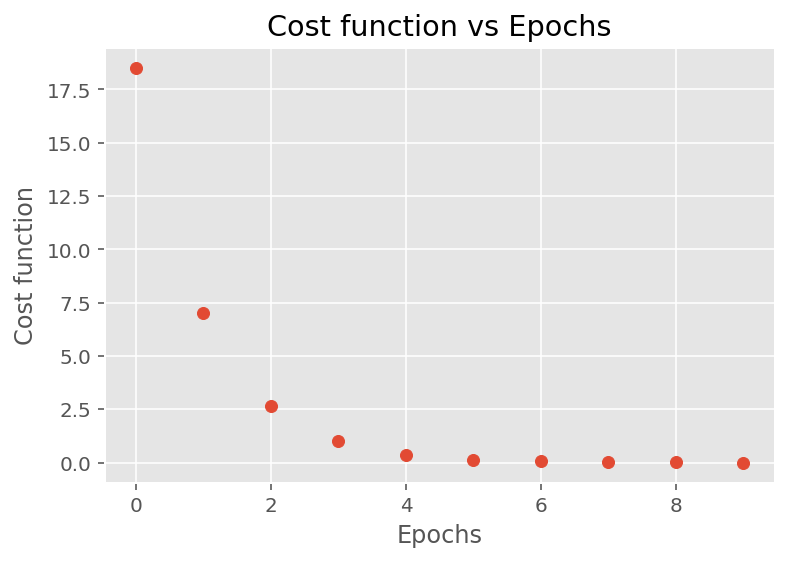

In [9]:
# Let's visualize the learning curve 
plt.scatter([i for i in range(epochs)], cost_history)
plt.title('Cost function vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Cost function')
plt.show()

### Visualization of the result
Finally, let's visualize the **machine learning model vs original data distribution**

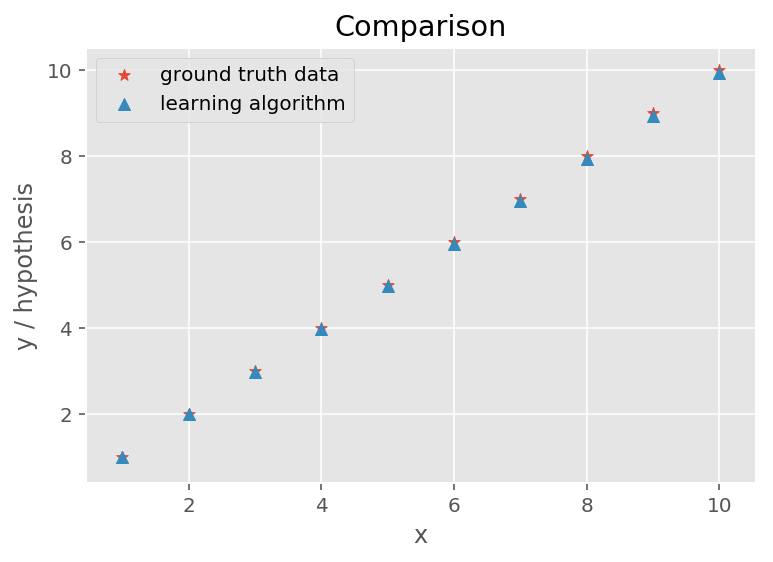

In [10]:
plt.scatter(x, y, label='ground truth data', marker='*')
plt.scatter(x, [each*weights for each in x], label='learning algorithm', marker='^')
plt.title('Comparison')
plt.xlabel('x')
plt.ylabel('y / hypothesis')
plt.legend()
plt.show()